<a href="https://colab.research.google.com/github/amitnits2016/fastai/blob/master/5_VehicleClassClassification/5_VehicleClassClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [45]:
from fastai.vision import *
from fastai.metrics import *
from fastai.imports import *
from fastai.callbacks import *
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [17]:
path= Path('/content/drive/My Drive/AAIN0896/fastai/Multiclass-classification-5-vehical-classes')

In [18]:
path.ls()

[PosixPath('/content/drive/My Drive/AAIN0896/fastai/Multiclass-classification-5-vehical-classes/labels.csv'),
 PosixPath('/content/drive/My Drive/AAIN0896/fastai/Multiclass-classification-5-vehical-classes/test_actual_labels.csv'),
 PosixPath('/content/drive/My Drive/AAIN0896/fastai/Multiclass-classification-5-vehical-classes/test'),
 PosixPath('/content/drive/My Drive/AAIN0896/fastai/Multiclass-classification-5-vehical-classes/train'),
 PosixPath('/content/drive/My Drive/AAIN0896/fastai/Multiclass-classification-5-vehical-classes/models')]

In [19]:
tfms = get_transforms(max_rotate=10.0, max_zoom=1.1, max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75)

In [20]:
data=ImageDataBunch.from_csv(path, folder='train', test='test',csv_labels='labels.csv',valid_pct=0.2, size=224, seed=1, bs=64
                             ).normalize(imagenet_stats)

In [7]:
data

ImageDataBunch;

Train: LabelList (4000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bicycle,Bicycle,Bicycle,Bicycle,Bicycle
Path: /content/drive/My Drive/AAIN0896/fastai/Multiclass-classification-5-vehical-classes;

Valid: LabelList (1000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bus,Motorcycle,Car,Car,Bus
Path: /content/drive/My Drive/AAIN0896/fastai/Multiclass-classification-5-vehical-classes;

Test: LabelList (788 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /content/drive/My Drive/AAIN0896/fastai/Multiclass-classification-5-vehical-classes

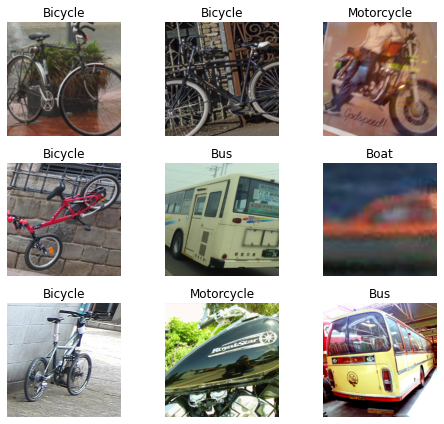

In [8]:
data.show_batch(rows=3, figsize=(7, 6))

In [9]:
print(data.classes)

['Bicycle', 'Boat', 'Bus', 'Car', 'Motorcycle']


In [10]:
learn_resnet101 = cnn_learner(data, models.resnet101, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth


In [11]:
learn_resnet101.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [12]:
learn_resnet101.fit_one_cycle(20)

epoch,train_loss,valid_loss,accuracy,time
0,0.562812,0.260366,0.909000,34:22
1,0.351126,0.259619,0.910000,05:13
2,0.282586,0.234040,0.928000,05:02
3,0.216663,0.306027,0.910000,05:00
4,0.157301,0.254216,0.930000,05:02
5,0.122555,0.270847,0.926000,05:02
6,0.080548,0.215435,0.936000,05:03
7,0.071464,0.241517,0.929000,05:04
8,0.053568,0.258536,0.933000,05:08
9,0.054034,0.272522,0.944000,05:06


In [13]:
learn_resnet101.save('learn_resnet101')

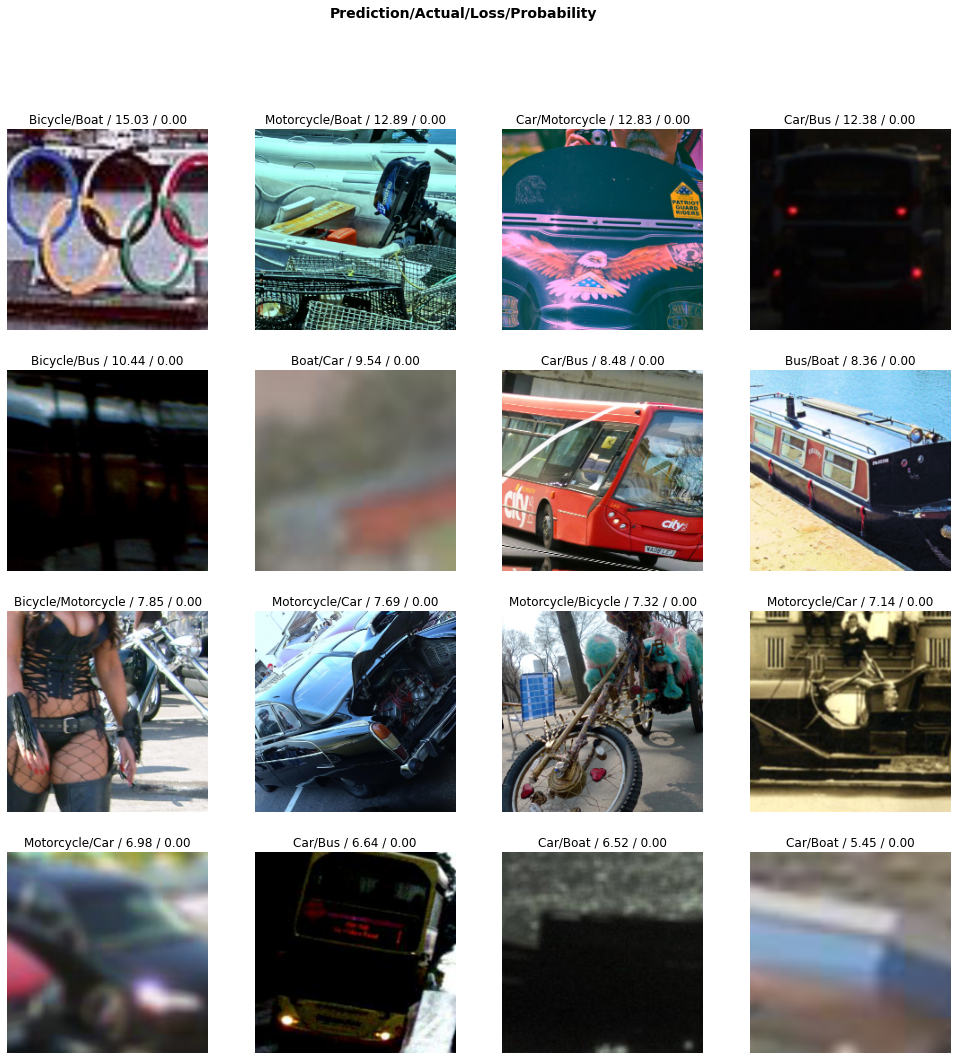

In [24]:
interp_resnet101 = ClassificationInterpretation.from_learner(learn_resnet101)
interp_resnet101.plot_top_losses(16, figsize=(17,17))

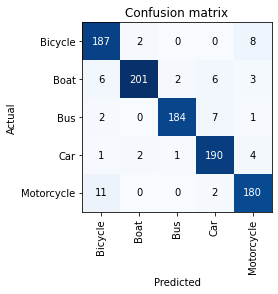

In [26]:
interp_resnet101.plot_confusion_matrix()

In [27]:
interp_resnet101.most_confused(min_val=3)

[('Motorcycle', 'Bicycle', 11),
 ('Bicycle', 'Motorcycle', 8),
 ('Bus', 'Car', 7),
 ('Boat', 'Bicycle', 6),
 ('Boat', 'Car', 6),
 ('Car', 'Motorcycle', 4),
 ('Boat', 'Motorcycle', 3)]

In [28]:
preds = []
cat = []
filename = []
for i in range(0,788):
    f = str(learn_resnet101.data.test_ds.items[i]).split('/')[-1]
    p = learn_resnet101.predict(data.test_ds.x[i])
    filename.append(f)    
    preds.append(int(p[0]))
    cat.append(str(p[0]))

In [29]:
sub_file = pd.read_csv(path/'test_actual_labels.csv', header='infer')
sub_file.head()

,image_name,tags
0,001178_05.jpg,Bicycle
1,001184_08.jpg,Bicycle
2,001188_03.jpg,Bicycle
3,001195_05.jpg,Bicycle
4,001201_19.jpg,Bicycle


In [30]:
df=pd.DataFrame(list(zip(filename,cat)),columns=['image_name','tags_resnet101'])
df.head()

,image_name,tags_resnet101
0,000130_14.jpg,Bus
1,000525_10.jpg,Car
2,000133_09.jpg,Bus
3,000525_19.jpg,Car
4,000134_04.jpg,Bus


In [31]:
#Create dataframe from the predicted  value
sub_file = pd.merge (sub_file,df,on='image_name')
sub_file.head()

,image_name,tags,tags_resnet101
0,001178_05.jpg,Bicycle,Bicycle
1,001184_08.jpg,Bicycle,Bicycle
2,001188_03.jpg,Bicycle,Bicycle
3,001195_05.jpg,Bicycle,Bicycle
4,001201_19.jpg,Bicycle,Bicycle


In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(sub_file['tags'], sub_file['tags_resnet101']))

              precision    recall  f1-score   support

     Bicycle       0.95      0.94      0.94       118
        Boat       0.96      0.95      0.96       150
         Bus       0.99      0.97      0.98       183
         Car       0.92      0.95      0.93       151
  Motorcycle       0.95      0.96      0.95       186

    accuracy                           0.96       788
   macro avg       0.95      0.95      0.95       788
weighted avg       0.96      0.96      0.96       788



In [35]:
confusion_matrix(sub_file['tags'], sub_file['tags_resnet101'])

array([[111,   0,   0,   1,   6],
       [  1, 143,   0,   6,   0],
       [  1,   2, 178,   2,   0],
       [  0,   3,   2, 143,   3],
       [  4,   1,   0,   3, 178]])

In [38]:
sub_file.to_csv(path/'result_resnet101.csv')

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


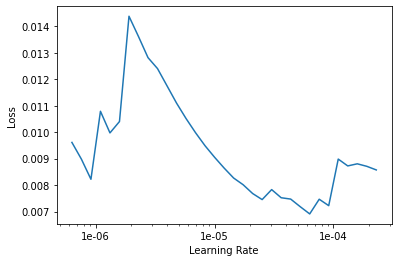

In [39]:
learn_resnet101.unfreeze()
learn_resnet101.lr_find()
learn_resnet101.recorder.plot()

In [49]:
learn_resnet101.fit_one_cycle(10,max_lr=slice(7e-7,2e-4), callbacks=[SaveModelCallback(learn_resnet101, every='epoch', monitor='accuracy')])

epoch,train_loss,valid_loss,accuracy,time
0,0.002867,0.295656,0.946000,05:18
1,0.002278,0.294982,0.946000,05:19
2,0.001861,0.322974,0.942000,05:17
3,0.004769,0.329778,0.938000,05:20
4,0.003037,0.315873,0.941000,05:21
5,0.002377,0.314672,0.944000,05:17
6,0.001189,0.309180,0.942000,05:19
7,0.001413,0.309506,0.941000,05:16
8,0.001661,0.310890,0.942000,05:18
9,0.001905,0.311290,0.941000,05:18


In [50]:
learn_resnet101.save('learn_resnet101_updated')

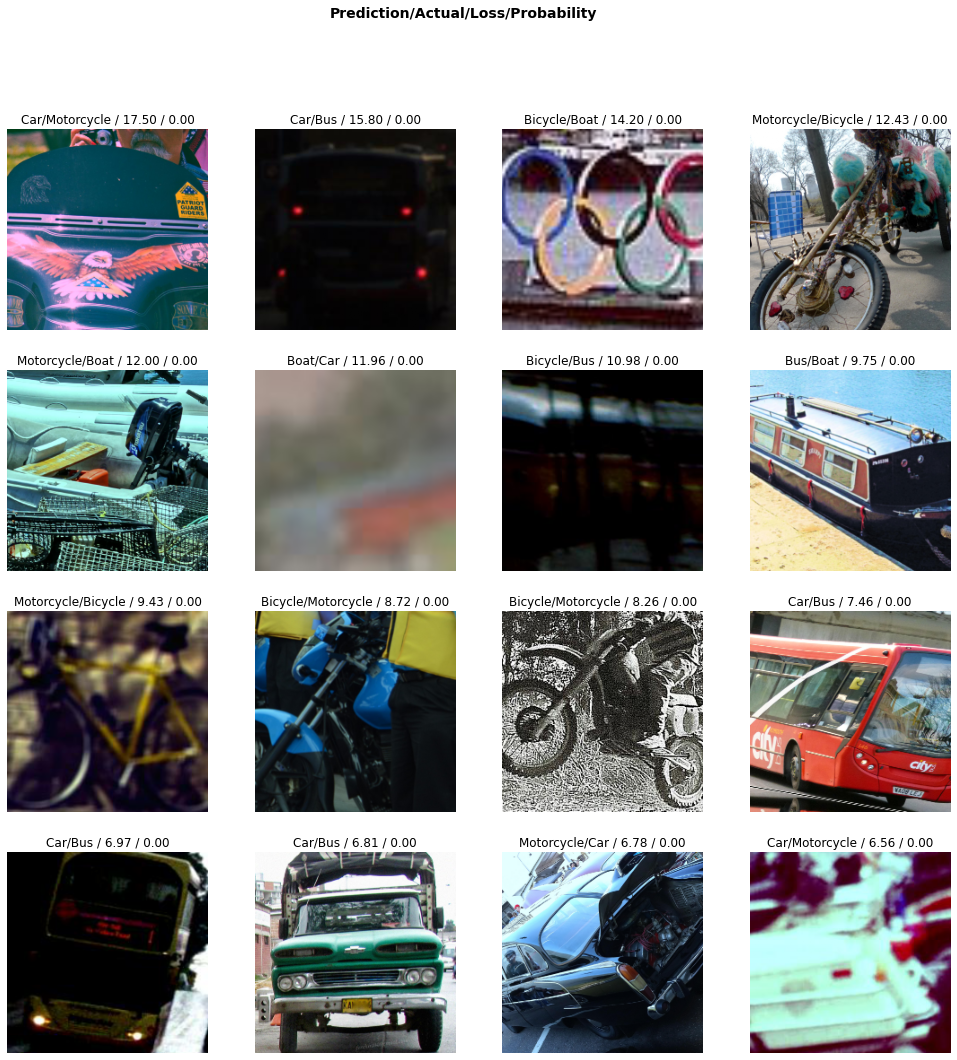

In [51]:
interp_resnet101 = ClassificationInterpretation.from_learner(learn_resnet101)
interp_resnet101.plot_top_losses(16, figsize=(17,17))

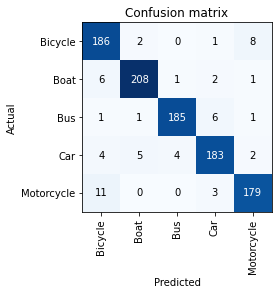

In [52]:
interp_resnet101.plot_confusion_matrix()

In [53]:
interp_resnet101.most_confused(min_val=3)

[('Motorcycle', 'Bicycle', 11),
 ('Bicycle', 'Motorcycle', 8),
 ('Boat', 'Bicycle', 6),
 ('Bus', 'Car', 6),
 ('Car', 'Boat', 5),
 ('Car', 'Bicycle', 4),
 ('Car', 'Bus', 4),
 ('Motorcycle', 'Car', 3)]

In [55]:
preds = []
cat = []
filename = []
for i in range(0,788):
    f = str(learn_resnet101.data.test_ds.items[i]).split('/')[-1]
    p = learn_resnet101.predict(data.test_ds.x[i])
    filename.append(f)    
    preds.append(int(p[0]))
    cat.append(str(p[0]))
sub_file1 = pd.read_csv(path/'test_actual_labels.csv', header='infer')
df1=pd.DataFrame(list(zip(filename,cat)),columns=['image_name','tags_resnet101_updated'])
sub_file1 = pd.merge (sub_file1,df1,on='image_name')
sub_file1.to_csv(path/'result_resnet101_updated.csv')
sub_file1.head()

,image_name,tags,tags_resnet101_updated
0,001178_05.jpg,Bicycle,Bicycle
1,001184_08.jpg,Bicycle,Bicycle
2,001188_03.jpg,Bicycle,Bicycle
3,001195_05.jpg,Bicycle,Bicycle
4,001201_19.jpg,Bicycle,Bicycle


In [56]:
print(classification_report(sub_file1['tags'], sub_file1['tags_resnet101_updated']))

              precision    recall  f1-score   support

     Bicycle       0.95      0.92      0.94       118
        Boat       0.97      0.96      0.96       150
         Bus       0.98      0.97      0.98       183
         Car       0.92      0.95      0.93       151
  Motorcycle       0.95      0.95      0.95       186

    accuracy                           0.95       788
   macro avg       0.95      0.95      0.95       788
weighted avg       0.95      0.95      0.95       788



In [57]:
confusion_matrix(sub_file1['tags'], sub_file1['tags_resnet101_updated'])

array([[109,   0,   0,   1,   8],
       [  0, 144,   1,   5,   0],
       [  1,   1, 178,   3,   0],
       [  0,   3,   3, 143,   2],
       [  5,   1,   0,   3, 177]])

In [61]:
# Since Accuracy is 95% after LR tuning. So, We will go with the base model.
result_resnet101 = pd.read_csv(path/'result_resnet101.csv', index_col=0)
result_resnet101 = result_resnet101.drop(['tags'], axis=1)
result_resnet101.to_csv('final_predictions_resnet101')
result_resnet101.head()

,image_name,tags_resnet101
0,001178_05.jpg,Bicycle
1,001184_08.jpg,Bicycle
2,001188_03.jpg,Bicycle
3,001195_05.jpg,Bicycle
4,001201_19.jpg,Bicycle
